1. Importing Libraries

In [28]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud



# remove warnings

import warnings

warnings.filterwarnings('ignore')

2. Load The Dataset

In [29]:
# we have a dataset named netflix1 inside input folder

data = pd.read_csv('/content/netflix1.csv')



# Display the first five rows of the dataset

data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [30]:
# Describe the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [31]:
# Checking the shape of the data

num_rows, num_cols = data.shape



print("Shape of the Data:")

print(f"Number of Rows: {num_rows}")

print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 8790
Number of Columns: 10



3. Data Cleaning

In [32]:
# Check for missing values

print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [33]:
# Checking duplicates if any

data.duplicated().any()

False

In [34]:
# Convert 'date_added' to datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [35]:
# Show data types to confirm changes

data.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


4. Exploratory Data Analysis (EDA)

4.1 Content Type Distribution (Movies vs. TV Shows)

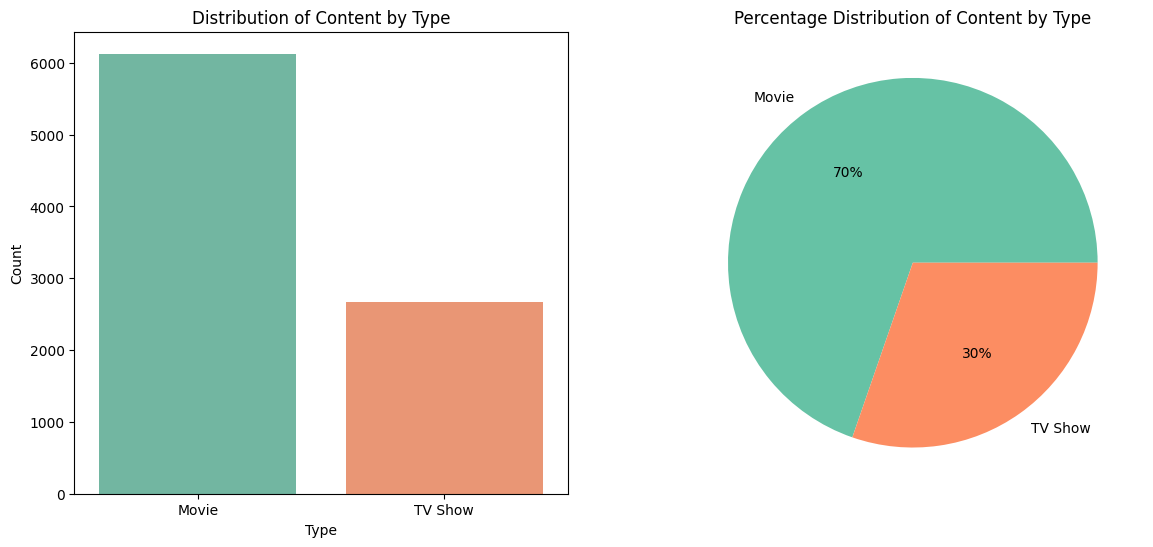

In [36]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()

# Plot the distribution

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')

plt.title('Distribution of Content by Type')

plt.xlabel('Type')

plt.ylabel('Count')



plt.subplot(1, 2, 2)

plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))

plt.title('Percentage Distribution of Content by Type')

plt.show()

4.2 Rating Frequency (Movies vs. TV Shows)

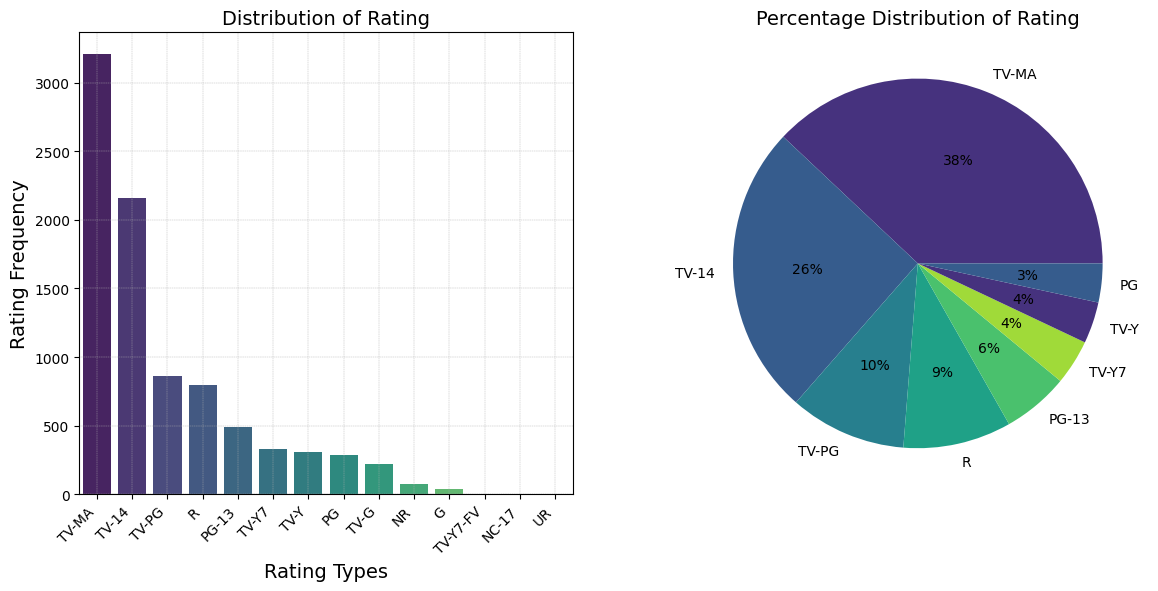

In [37]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.barplot(x='rating', y='count', data=ratings, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Rating Types", fontsize=14)

plt.ylabel("Rating Frequency", fontsize=14)

plt.title('Distribution of Rating', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)



plt.subplot(1, 2, 2)

plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))

plt.title('Percentage Distribution of Rating', fontsize=14)

plt.show()

4.3 Top 10 Countries with Most Content

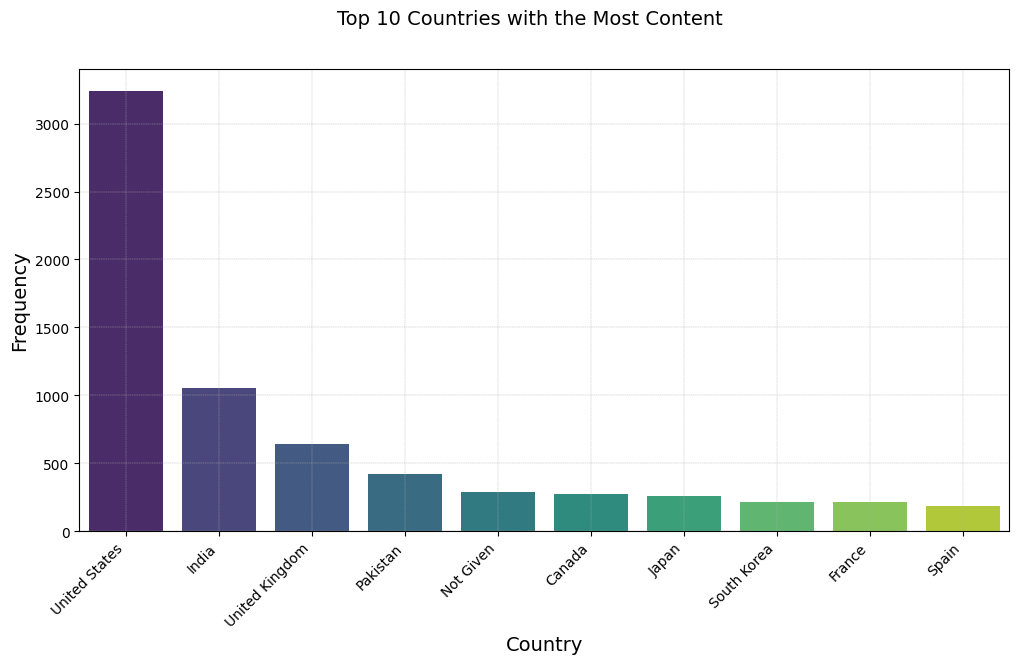

In [38]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(12, 6))

sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Country", fontsize=14)

plt.ylabel("Frequency", fontsize=14)

plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

4.4 Top 15 Directors with the Most Titles

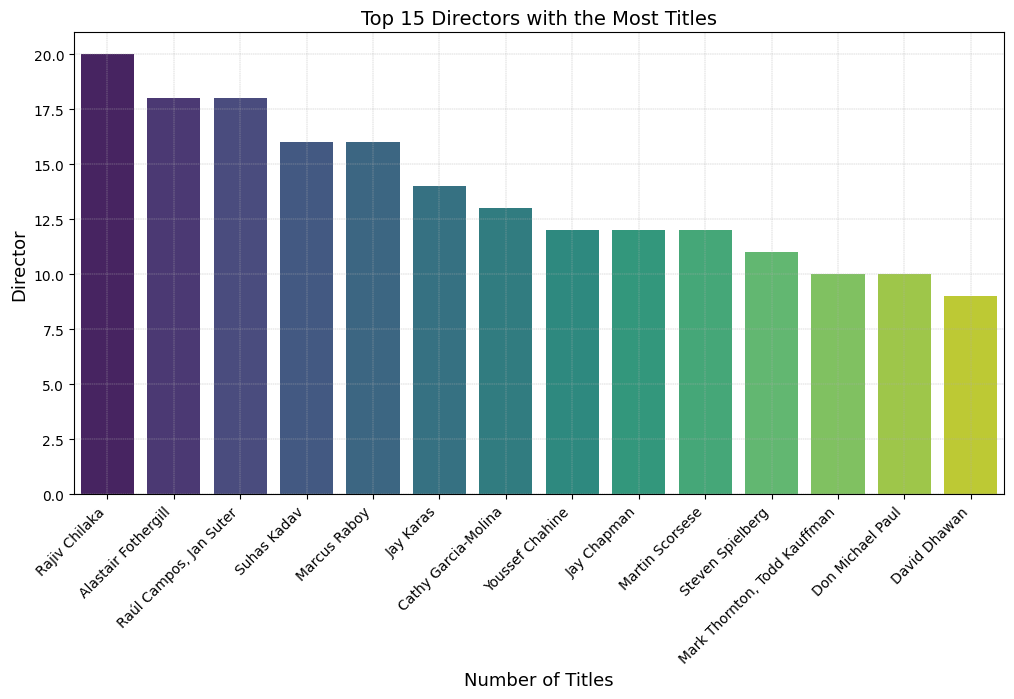

In [39]:
# Count titles by director

top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

# Plot top directors

plt.figure(figsize=(12, 6))

sns.barplot(y='count', x='director', data=top_directors, palette='viridis')

plt.title('Top 15 Directors with the Most Titles', fontsize=14)

plt.xlabel('Number of Titles', fontsize=13)

plt.ylabel('Director', fontsize=13)

plt.xticks(rotation=45, ha='right')

plt.grid(True, which='both', linestyle='--', linewidth=0.3)

plt.show()

4.5 Top 10 Popular Movie Genres

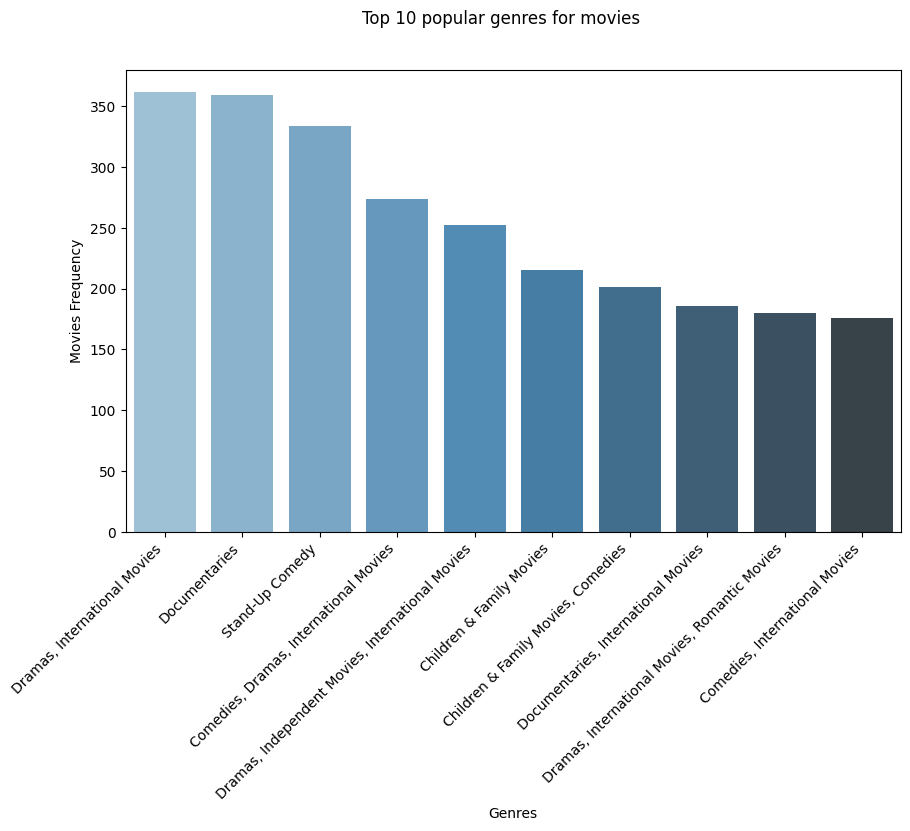

In [40]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]



plt.figure(figsize=(10, 6))

sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")

plt.ylabel("Movies Frequency")

plt.suptitle("Top 10 popular genres for movies")

plt.show()

4.6 Top 10 TV Shows Genres

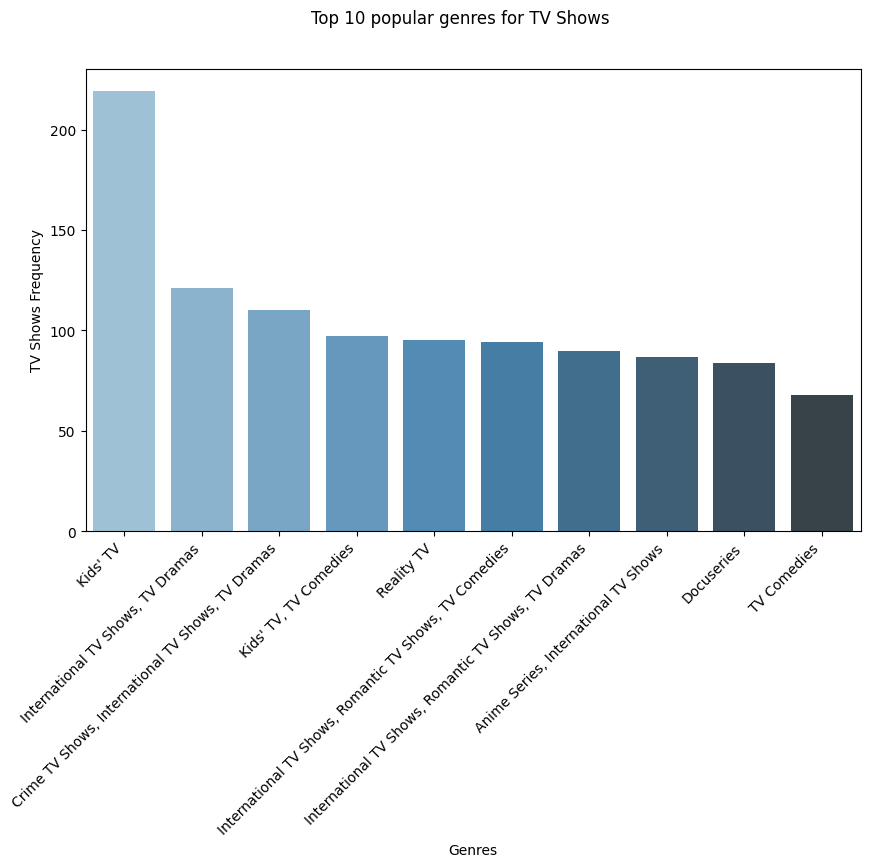

In [41]:
plt.figure(figsize=(10, 6))

sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')

plt.xticks(rotation=45, ha='right')

plt.xlabel("Genres")

plt.ylabel("TV Shows Frequency")

plt.suptitle("Top 10 popular genres for TV Shows")

plt.show()

In [42]:
# Extract year and month from 'date_added'

data['year_added'] = data['date_added'].dt.year

data['month_added'] = data['date_added'].dt.month

4.7 Monthly Releases of Movies and TV shows

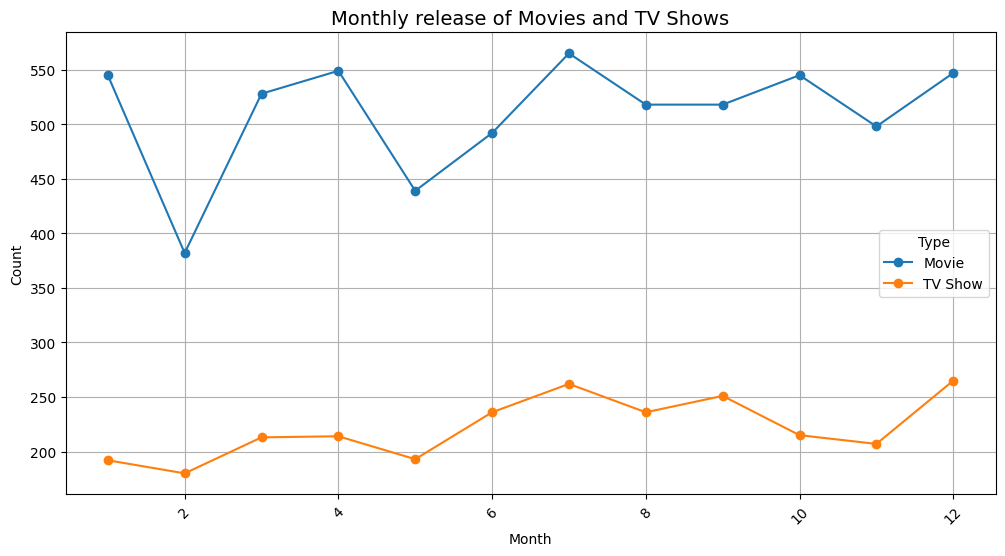

In [43]:
# Plot content added over the months using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Monthly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

4.8 Yearly Releases of Movies and TV shows

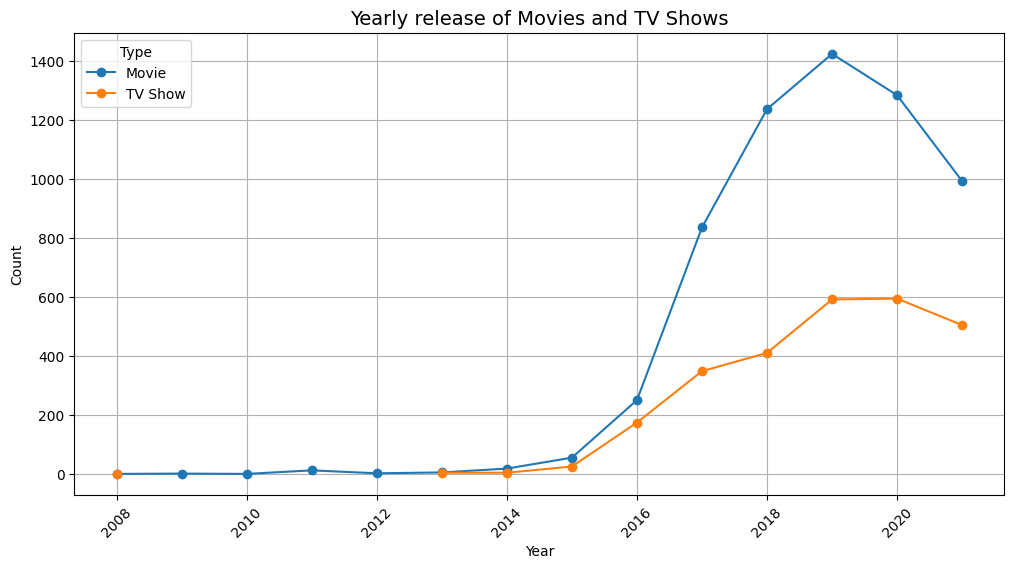

In [44]:
# Plot content added over the years using a line chart

plt.figure(figsize=(12, 6))

data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())

plt.title('Yearly release of Movies and TV Shows', fontsize=14)

plt.xlabel('Year')

plt.ylabel('Count')

plt.xticks(rotation=45)

plt.legend(title='Type')

plt.grid(True)

plt.show()

4.9 Word Cloud of Movie Titles

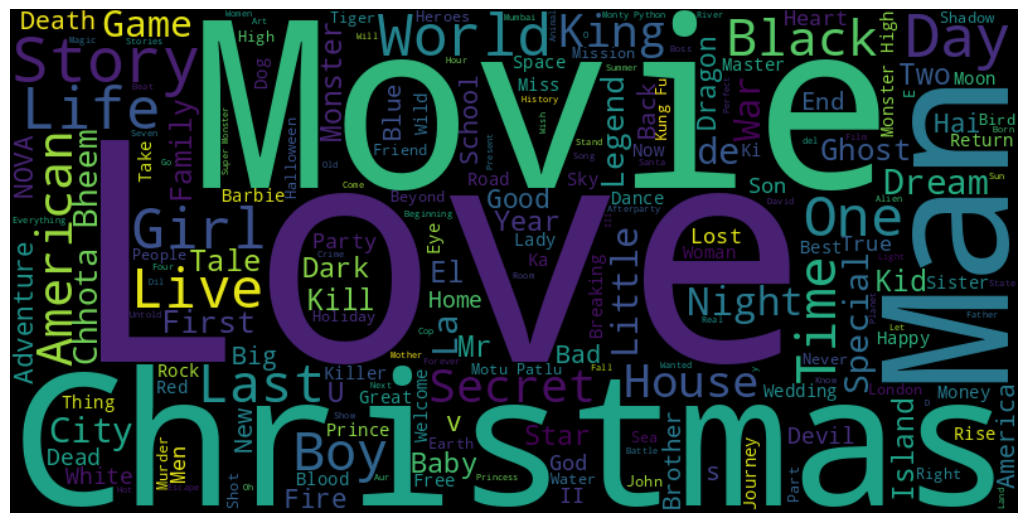

In [45]:
# Create a word cloud for movie titles

movie_titles = data[data['type'] == 'Movie']['title']

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))



# Display the word cloud

plt.figure(figsize=(13, 7))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

5. Conclusion and Insights

Through this analysis, we have gained valuable insights into the Netflix dataset. We have explored the distribution of content types, genres, and directors, as well as the trends in content release over time. The findings of this analysis can be used to inform content acquisition and production strategies, as well as to identify opportunities for growth and improvement.

Key Insights:

The majority of Netflix content is TV Shows, with a significant increase in TV Show releases over the years.

Movies are the second most common type of content, with a steady release pattern over the years.

The most popular genres are Documentaries, TV Dramas, and Comedies.

The top directors by content count are primarily associated with TV Shows.

There is a clear trend of increasing content release over the years, with a significant spike in 2021.

The word cloud of movie titles highlights the diversity of content available on Netflix.

These insights can be used to guide future content development and acquisition strategies, ensuring that Netflix continues to meet the evolving needs and preferences of its subscribers.